In [1]:
import time
import pickle
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import additional_functions as af
import seaborn as sns
from model import CRAB_Model
seed_value = 12345678
random.seed(seed_value)
np.random.seed(seed=seed_value)

In [2]:
runs = 1
steps = 300
seeds = [0] 

In [3]:
micro_variables = []
macro_variables = []
for i, seed in enumerate(seeds):
    # print(("Model initialized with " + str(H) + " Households"))
    print("Run num", i, "with random seed", seed)

    tic = time.time()
    model = CRAB_Model(F1=50, F2=100, F3=100, H=3000, Exp=300, T=0.03,
                       flood_schedule={-100: 3, -140: 3},
                       fraction_exposed=0.4, cca_eff={"Elevation": 3,
                                                      "Wet_proof": 0.4,
                                                      "Dry_proof": 0.5},
                       flood_prob=1, av_network=7, social_int=True,
                       attributes='Hom',cca_model="PMT", 
                       collect_each=1, seed=seed)
    model.reset_randomizer(seed)

    for j in range(steps):
        print("#------------ step", j+1, "------------#")
        model.step()
    toc = time.time()
    runtime = toc - tic
    # runtimes.append(runtime)
    print("MODEL runtime: " + str(runtime))
    print()

    # # --------
    # # COMMENT:
    # # Look into efficient output saving later
    # # --------
    macro_variable = model.datacollector.get_model_vars_dataframe()
    # # Iteratively add dataframe to list
    macro_variables.append(macro_variable)
    micro_variable_hom = model.datacollector.get_agent_vars_dataframe()
    micro_variables.append(micro_variable_hom)

Run num 0 with random seed 0
#------------ step 1 ------------#
#------------ step 2 ------------#
#------------ step 3 ------------#
MODEL runtime: 1.9615132808685303



In [5]:
# select only Type hOUSEHOLD
micro_variables = [micro_variables[i][micro_variables[i].Type == "Household"] for i in range(len(micro_variables))]


Step  AgentID
0     1          False
      2          False
      3          False
      4          False
      5          False
                 ...  
3     3247        True
      3248        True
      3249        True
      3250        True
      3251       False
Name: Type, Length: 13004, dtype: bool

In [4]:
#micro_df = pd.concat(micro_variables)
#reindex = micro_df.reset_index(level=["Step"])
#micro_df.to_csv("micro_variables_net_7")
#macro = pd.concat(macro_variables)
#macro_variable.to_csv("macro_variables_net_7")
macro_variable = model.datacollector.get_model_vars_dataframe()

In [5]:
macro_variable['Unemployment rate coastal'].plot()

<AxesSubplot:>

In [6]:
macro_variable['GDP total'].pct_change().plot()

<AxesSubplot:>

In [12]:
sns.lineplot(data = micro_variable, x = 'Step', y = 'House_value')
sns.lineplot(data = micro_variable_hom, x = 'Step', y = 'House_value')

<AxesSubplot:xlabel='Step', ylabel='House_value'>

In [8]:
1.4 * 2.3**10

5799.711569910854

KeyError: 'Households Coastal region'

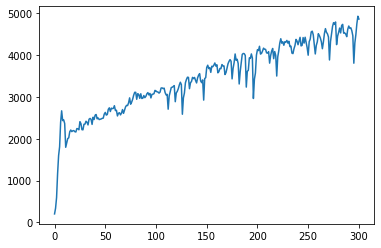

In [9]:
macro_variable['GDP total'].plot()
macro_variable['Households Coastal region'].plot()


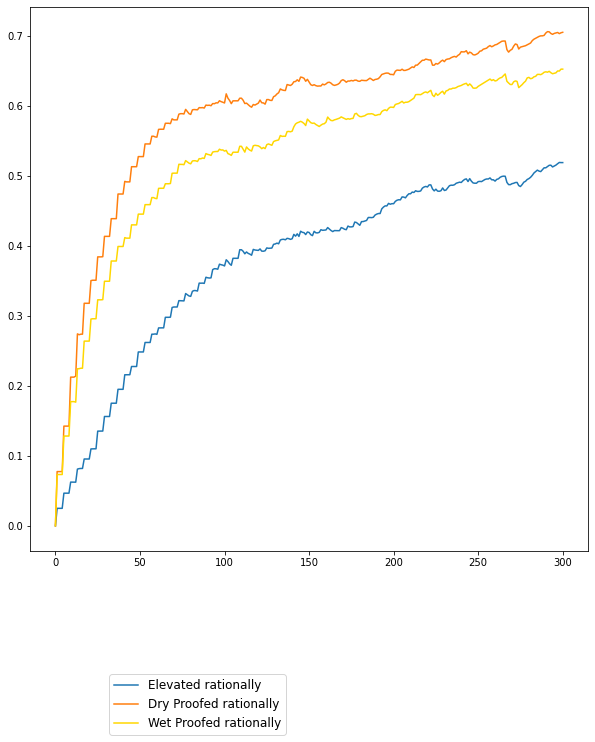

In [ ]:
data_cca = macro_variable #data_pmt_int
pop = data_cca["Households Coastal region"] * 0.4

#with plt.style.context(['science','no-latex','ieee']):
plt.figure(figsize=(10,10))
#ax = fig.add_subplot(#)
#plt.plot(data_cca['Total_UG_CCA_coastal_be'] / pop, label = "Adapted behaviorally")
plt.plot(data_cca['Total_UG_CCA_coastal_elev'] / pop, label = "Elevated rationally")
#plt.plot(data['Total_UG_CCA_coastal_des_elev'] / data['Population Households Coastal'],  label = "Desire to elevate rationally")
plt.plot(data_cca['Total_UG_CCA_coastal_dry_proof'] / pop, label = "Dry Proofed rationally")
plt.plot(data_cca['Total_UG_CCA_coastal_wet_proof'] /pop,  label = "Wet Proofed rationally", color = "gold")
plt.legend( loc='lower center', bbox_to_anchor =(0.3, -0.35), fontsize = 12)


In [ ]:
macro_variable["Real_GDP_serv_coastal"].plot()
macro_variable["Real_GDP_cons_coastal"].plot()

KeyError: 'Real_GDP_serv_coastal'

<AxesSubplot:>

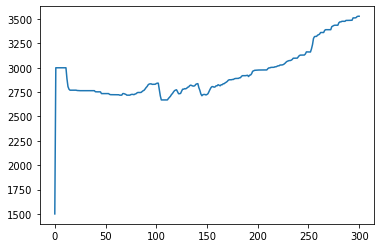

In [ ]:
macro_variable["Households Coastal region"].plot()

In [ ]:
macro_variable['Population Consumption firms Coastal'].plot()
macro_variable['Population Service firms Coastal'].plot()

KeyError: 'Population Consumption firms Coastal'

<AxesSubplot:>

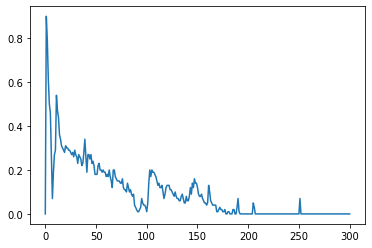

In [ ]:
macro_variable['Unemployment rate coastal'].plot()

In [ ]:
stop

NameError: name 'stop' is not defined

In [ ]:
n_43 = [135, 145, 155, 158, 161, 165, 166, 51, 3252, 182, 3257, 3258, 3319, 3261, 3262, 3267, 3269, 3271, 200, 73, 3274, 75, 204, 3279, 3323, 209, 3282, 3283, 211, 85, 216, 3290, 3298, 3301, 3303, 3305, 235, 3309, 3310, 3312, 3314, 247, 123]

In [ ]:
n_42 = [135, 139, 145, 155, 158, 161, 165, 169, 51, 3252, 182, 3257, 3261, 3262, 65, 3271, 200, 73, 3274, 75, 204, 78, 3279, 209, 3282, 3283, 211, 85, 3285, 3290, 95, 3298, 3301, 3303, 231, 3305, 235, 3310, 3312, 3314, 247, 123]

In [ ]:
n_35_1 = [135, 145, 155, 158, 161, 165, 51, 3252, 182, 3257, 3261, 3262, 3271, 200, 73, 3274, 75, 204, 3279, 209, 3282, 3283, 211, 85, 3290, 3298, 3301, 3303, 3305, 235, 3310, 3312, 3314, 247, 123]


In [ ]:
n_35_2 = [135, 145, 155, 158, 161, 165, 51, 3252, 182, 3257, 3261, 3262, 3271, 200, 73, 3274, 75, 204, 3279, 209, 3282, 3283, 211, 85, 3290, 3298, 3301, 3303, 3305, 235, 3310, 3312, 3314, 247, 123]

In [ ]:
a = set(n_35_1) - set(n_35_2)

In [ ]:
a

set()

In [ ]:
variables = ['At_risk', 'Education', 'Step', 'AgentID', 'Damage_coeff', 'House_value', 'Wage', 'Net worth','Monetary_damage' ]

In [ ]:
results_path =  "/Users/ataberna/Documents/PNAS/Results/test_homo"

In [ ]:
micro_variables_pmt_int_hom = pd.read_csv(results_path + '/micro_cca_2_floods_pmt_hom_t', usecols= variables)

In [ ]:
micro_variables_eu_hom = pd.read_csv(results_path + '/micro_2floods_eu_hom',  usecols= variables)

ValueError: Usecols do not match columns, columns expected but not found: ['House_value']

In [ ]:
micro_variables_no_cca_hom = pd.read_csv(results_path + '/micro_cca_2_floods_no_hom_t',  usecols= variables)

In [ ]:
micro_variables_eu_hom = micro_variables_pmt_int_hom

In [ ]:
micro_dfs_homo = [micro_variables_no_cca_hom, micro_variables_eu_hom, micro_variables_pmt_int_hom]

In [ ]:
micro_variables_pmt_int = pd.read_csv(results_path + '/micro_cca_2_floods_pmt_het_t',  usecols= variables)
micro_variables_pmt_int_no_floods = pd.read_csv(results_path + '/micro_pmt_cca_no_floods',  usecols= variables)
micro_variables_eu = pd.read_csv(results_path + '/micro_eu_cca_2_floods',  usecols= variables)
micro_variables_eu_no_floods = pd.read_csv(results_path + '/micro_eu_cca_no_floods',  usecols= variables)
micro_variables_no_cca = pd.read_csv(results_path + '/micro_no_cca_2_floods',  usecols= variables)
micro_variables_no_floods = pd.read_csv(results_path + '/micro_no_cca_no_floods',  usecols= variables)

In [ ]:
micro_dfs = [micro_variables_no_floods, micro_variables_no_cca,micro_variables_eu_no_floods ,micro_variables_eu, micro_variables_pmt_int_no_floods, micro_variables_pmt_int]

In [ ]:
micro_dfs[0]

In [ ]:
micro_dfs[5]['Education'].hist()

<AxesSubplot:>

In [ ]:
theories = ['No adaptation', 'No adaptation', 'EU', 'EU', 'PMT', 'PMT']

In [ ]:
at_risk_df_list = []
at_risk_df_list_homo = []
homo = 0 
for i in range(len(micro_dfs)):
    at_risk_df =  micro_dfs[i].loc[(micro_dfs[i]['At_risk'] == True) & (micro_dfs[i]['Education'] != 1) & (micro_dfs[i]['Step'] >1 ) &  (micro_dfs[i]['AgentID'] % 10 == 0) ]# & (datasets[i]['Flooded'] == True)]
    at_risk_df['Theory'] = theories[i]
    if i % 2 == 0:
    
        at_risk_df_homo =  micro_dfs_homo[homo].loc[(micro_dfs_homo[homo]['At_risk'] == True) & (micro_dfs_homo[homo]['Education'] != 1) & (micro_dfs_homo[homo]['Step'] >1 ) &  (micro_dfs_homo[homo]['AgentID'] % 10 == 0) ]
        at_risk_df_homo['Theory'] = theories[homo]
        at_risk_df_list_homo.append(at_risk_df_homo)

        homo += 1
    #at_risk_df['Education'] = at_risk_df['Education'] - 1
    at_risk_df_list.append(at_risk_df)

/var/folders/33/dr4cqnzj0597_7n7kbsrfht8cdq0jk/T/ipykernel_27989/1888705938.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  at_risk_df['Theory'] = theories[i]
/var/folders/33/dr4cqnzj0597_7n7kbsrfht8cdq0jk/T/ipykernel_27989/1888705938.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  at_risk_df_homo['Theory'] = theories[homo]


In [ ]:
plt.style.use(['science','no-latex','ieee'])

In [ ]:
at_risk_df_list[1]['Education'].hist()

<AxesSubplot:>

In [ ]:
linestyles = ['solid', (0, (3, 10, 1, 10)), 'dotted']
palette_1 = sns.color_palette("colorblind", 3)
font = 11
fig, axes = plt.subplots( 1,1, sharey = True, figsize = (7,7))
a =  0
for i in range(len(at_risk_df_list)):
    if i %2 == 0:

       legend = False
       sns.lineplot(at_risk_df_list[i + 1]['Step'], at_risk_df_list[i + 1]['Damage_coeff'], hue = at_risk_df_list[i + 1]['Education'], palette =palette_1, ci=95, linestyle = linestyles[a], legend=legend )

       a += 1
plt.plot(0,0, label = "Secondary", linestyle =linestyles[0], color = palette_1[0] )
plt.plot(0,0, label = "Tertiary", linestyle =linestyles[0], color = palette_1[1] )
plt.plot(0,0, label = "Post-grad", linestyle =linestyles[0], color = palette_1[2] )
plt.plot(0,0, label = "No adaptation - Heterogenous", linestyle =linestyles[0], color = 'black' )
plt.plot(0,0, label = "EU - Heterogenous", linestyle =linestyles[1], color = 'black' )
plt.plot(0,0, label = "Extended PMT - Heterogenous", linestyle =linestyles[2], color = 'black' )
plt.axvline(x = 100, linestyle = 'dashed')
plt.axvline(x = 140, linestyle = 'dashed')
plt.ylabel('Average damage coefficient', fontsize = font)
plt.xlabel('Step', fontsize = font)
plt.legend( loc = 'best', fontsize = font -1)
       #sns.lineplot(at_risk_df_list[i + 1]['Step'], at_risk_df_list[i + 1]['Elevated'], hue = at_risk_df_list[i + 1]['Education'], ci = None)

/Users/ataberna/opt/anaconda3/envs/gds/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/ataberna/opt/anaconda3/envs/gds/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/ataberna/opt/anaconda3/envs/gds/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result i

/Users/ataberna/opt/anaconda3/envs/gds/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/ataberna/opt/anaconda3/envs/gds/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/ataberna/opt/anaconda3/envs/gds/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result i

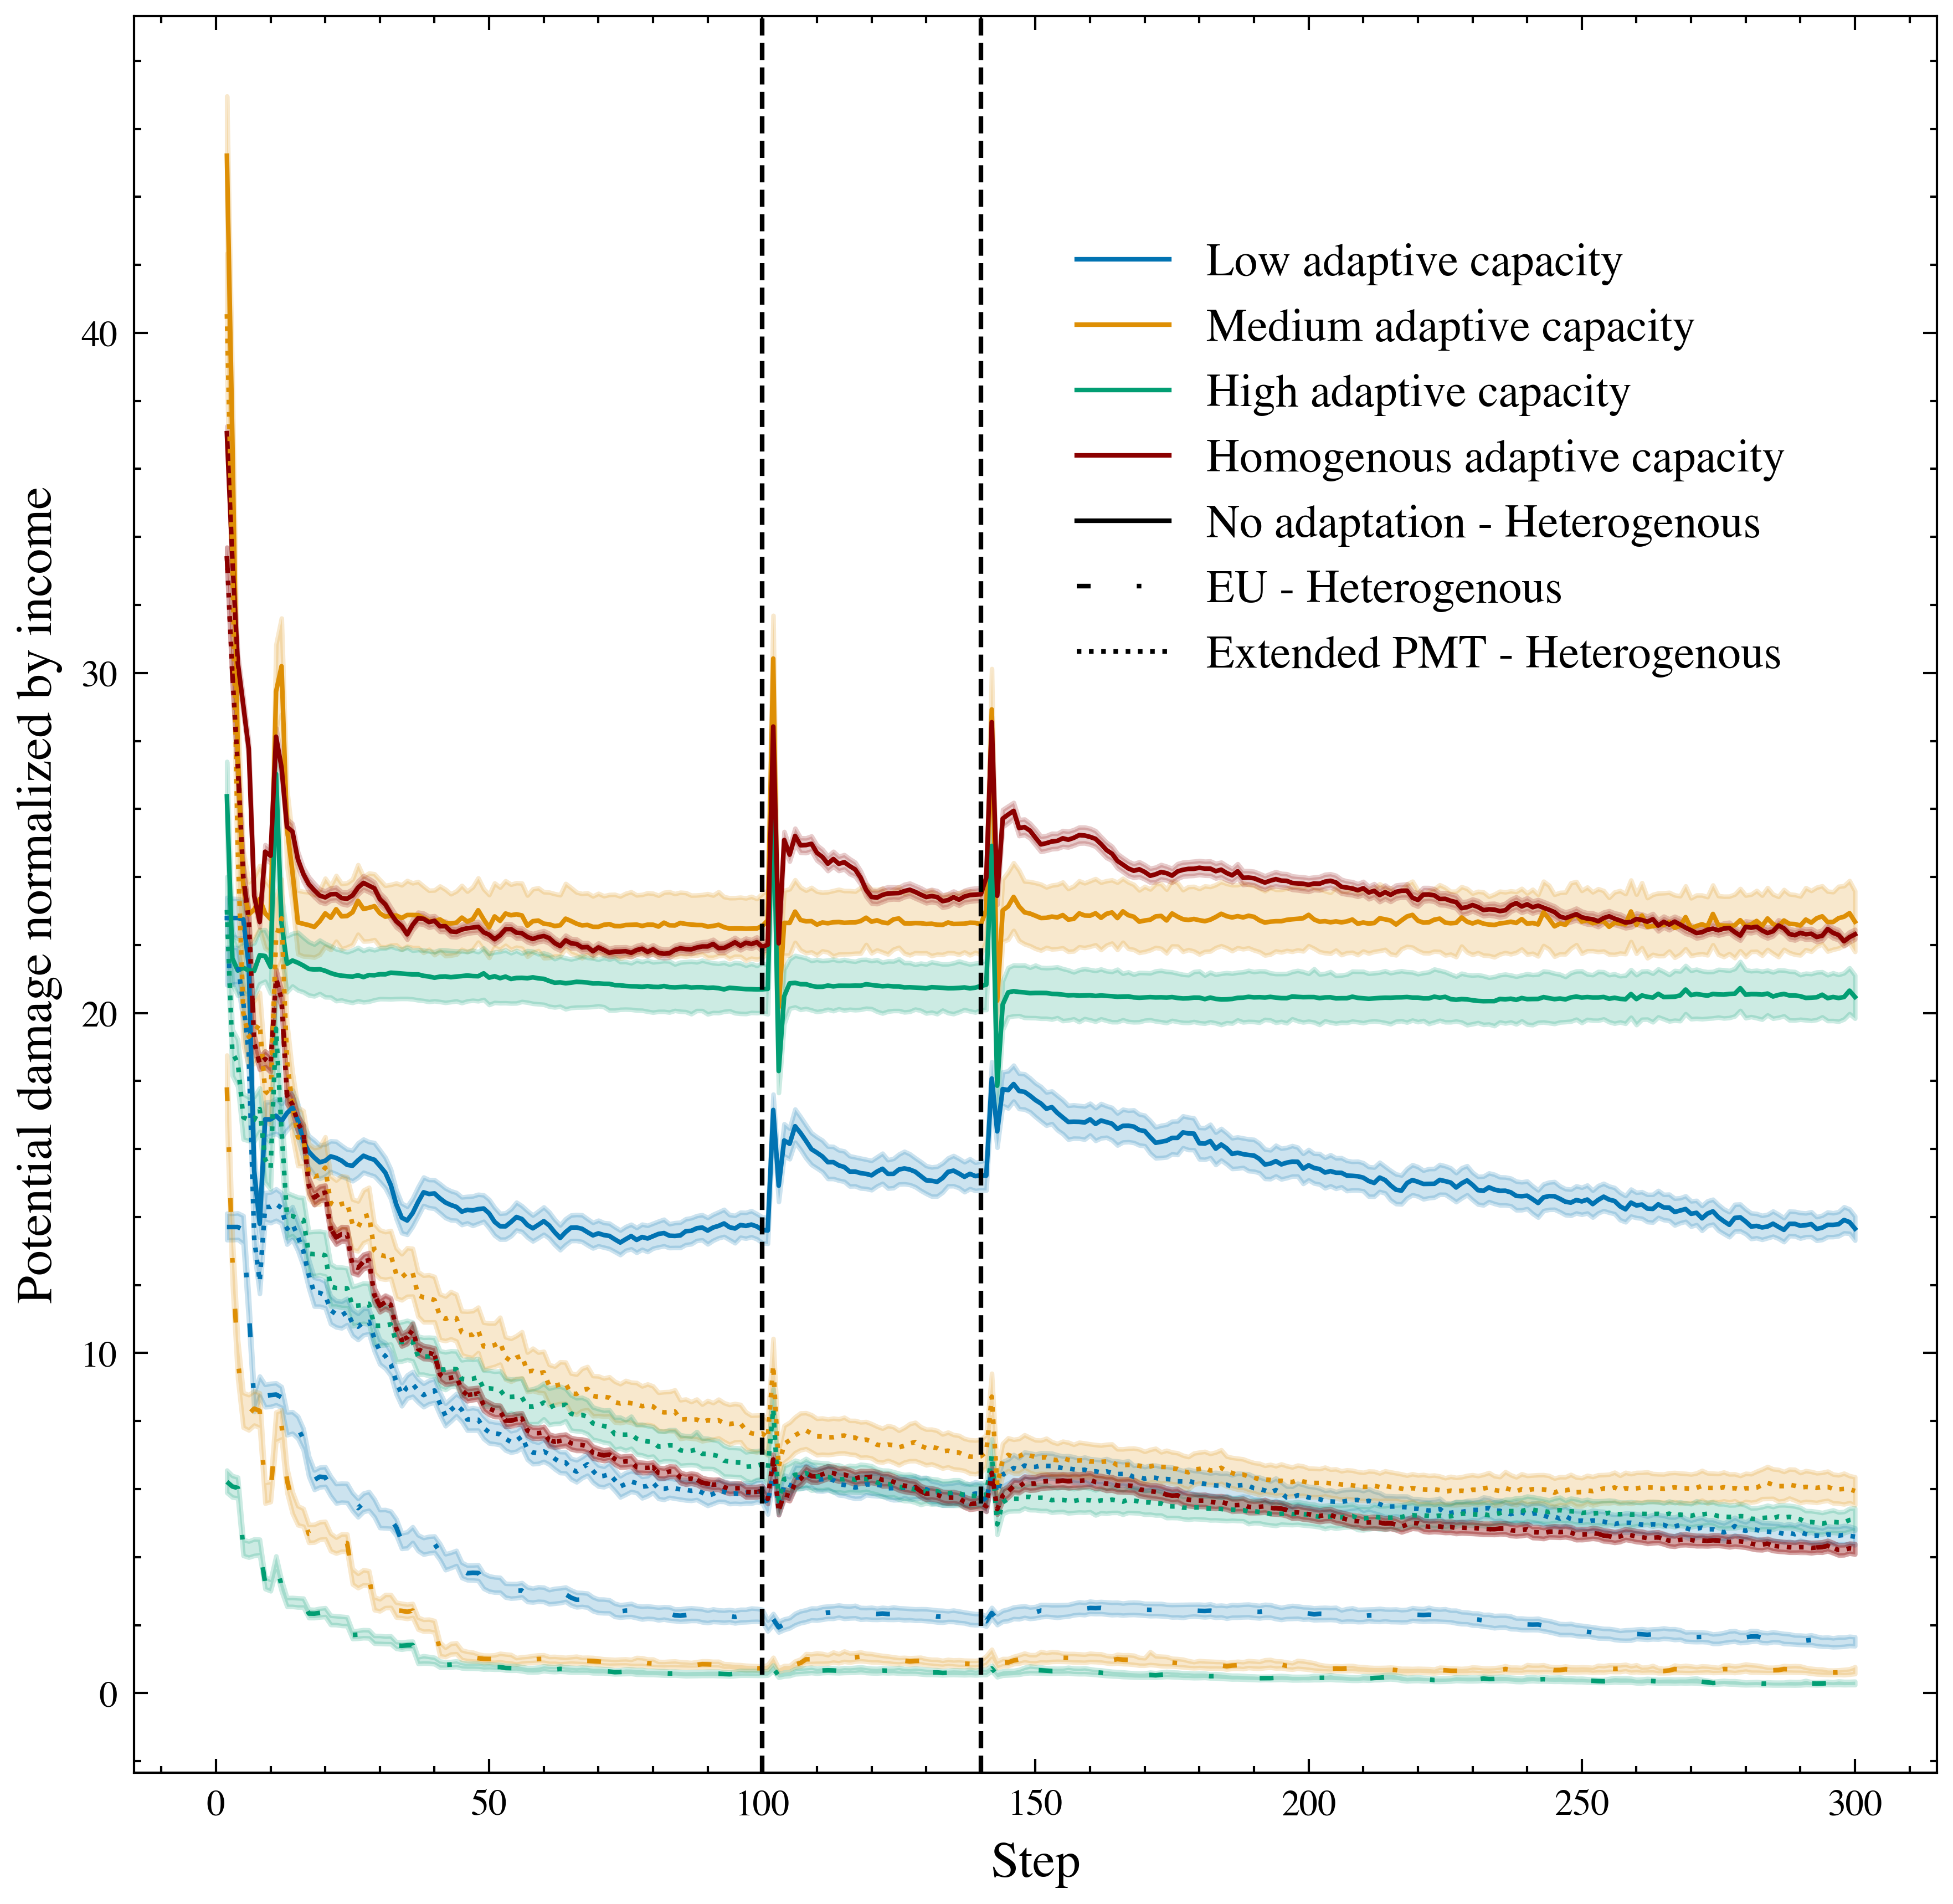

In [ ]:
linestyles = ['solid', (0, (3, 10, 1, 10)), 'dotted']
palette_1 = sns.color_palette("colorblind", 3)
font = 11
fig, axes = plt.subplots( 1,1, sharey = True, figsize = (7,7))
a =  0
for i in range(len(at_risk_df_list)):
    if i %2 == 0:

       legend = False
       sns.lineplot(at_risk_df_list[i + 1]['Step'], at_risk_df_list[i + 1]['Damage_coeff'] * at_risk_df_list[i + 1]['House_value'] / at_risk_df_list[i + 1]['Wage'] , hue = at_risk_df_list[i + 1]['Education'], palette =palette_1, ci=95, linestyle = linestyles[a], legend=legend )
       sns.lineplot(at_risk_df_list_homo[a]['Step'], at_risk_df_list_homo[a]['Damage_coeff'] * at_risk_df_list_homo[a]['House_value'] / at_risk_df_list_homo[a]['Wage'], color = 'darkred', ci=95, linestyle = linestyles[a] )

       a += 1
plt.plot(0,0, label = "Low adaptive capacity", linestyle =linestyles[0], color = palette_1[0] )
plt.plot(0,0, label = "Medium adaptive capacity", linestyle =linestyles[0], color = palette_1[1] )
plt.plot(0,0, label = "High adaptive capacity", linestyle =linestyles[0], color = palette_1[2] )
plt.plot(0,0, label = "Homogenous adaptive capacity", linestyle =linestyles[0], color = 'darkred' )
plt.plot(0,0, label = "No adaptation - Heterogenous", linestyle =linestyles[0], color = 'black' )
plt.plot(0,0, label = "EU - Heterogenous", linestyle =linestyles[1], color = 'black' )
plt.plot(0,0, label = "Extended PMT - Heterogenous", linestyle =linestyles[2], color = 'black' )
plt.axvline(x = 100, linestyle = 'dashed')
plt.axvline(x = 140, linestyle = 'dashed')
plt.ylabel('Potential damage normalized by income', fontsize = font)
plt.xlabel('Step', fontsize = font)
plt.legend( loc = 'best',bbox_to_anchor=(0.5, 0.6), fontsize = font -1)

In [ ]:
at_risk_df_list_homo

[          Step  AgentID  Net worth  At_risk  Education   Wage  Damage_coeff  \
 3009         1      260   1.178881     True   2.838333  1.099          0.85   
 3019         1      270   1.178356     True   2.838333  1.092          0.85   
 3069         1      320   1.176181     True   2.838333  1.063          0.85   
 3089         1      340   1.175731     True   2.838333  1.057          0.85   
 3109         1      360   1.173406     True   2.838333  1.026          0.85   
 ...        ...      ...        ...      ...        ...    ...           ...   
 43588840   300     4570   1.096456     True   2.838333  0.945          0.85   
 43588850   300     4580   1.096456     True   2.838333  0.945          0.85   
 43588901   300     4710   1.096456     True   2.838333  0.945          0.85   
 43588938   300     4790   1.096456     True   2.838333  0.945          0.85   
 43588980   300     4850   1.096456     True   2.838333  0.945          0.85   
 
           Monetary_damage  House_valu

/Users/ataberna/opt/anaconda3/envs/gds/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/ataberna/opt/anaconda3/envs/gds/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/ataberna/opt/anaconda3/envs/gds/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result i

AttributeError: 'AxesSubplot' object has no attribute 'ylabel'

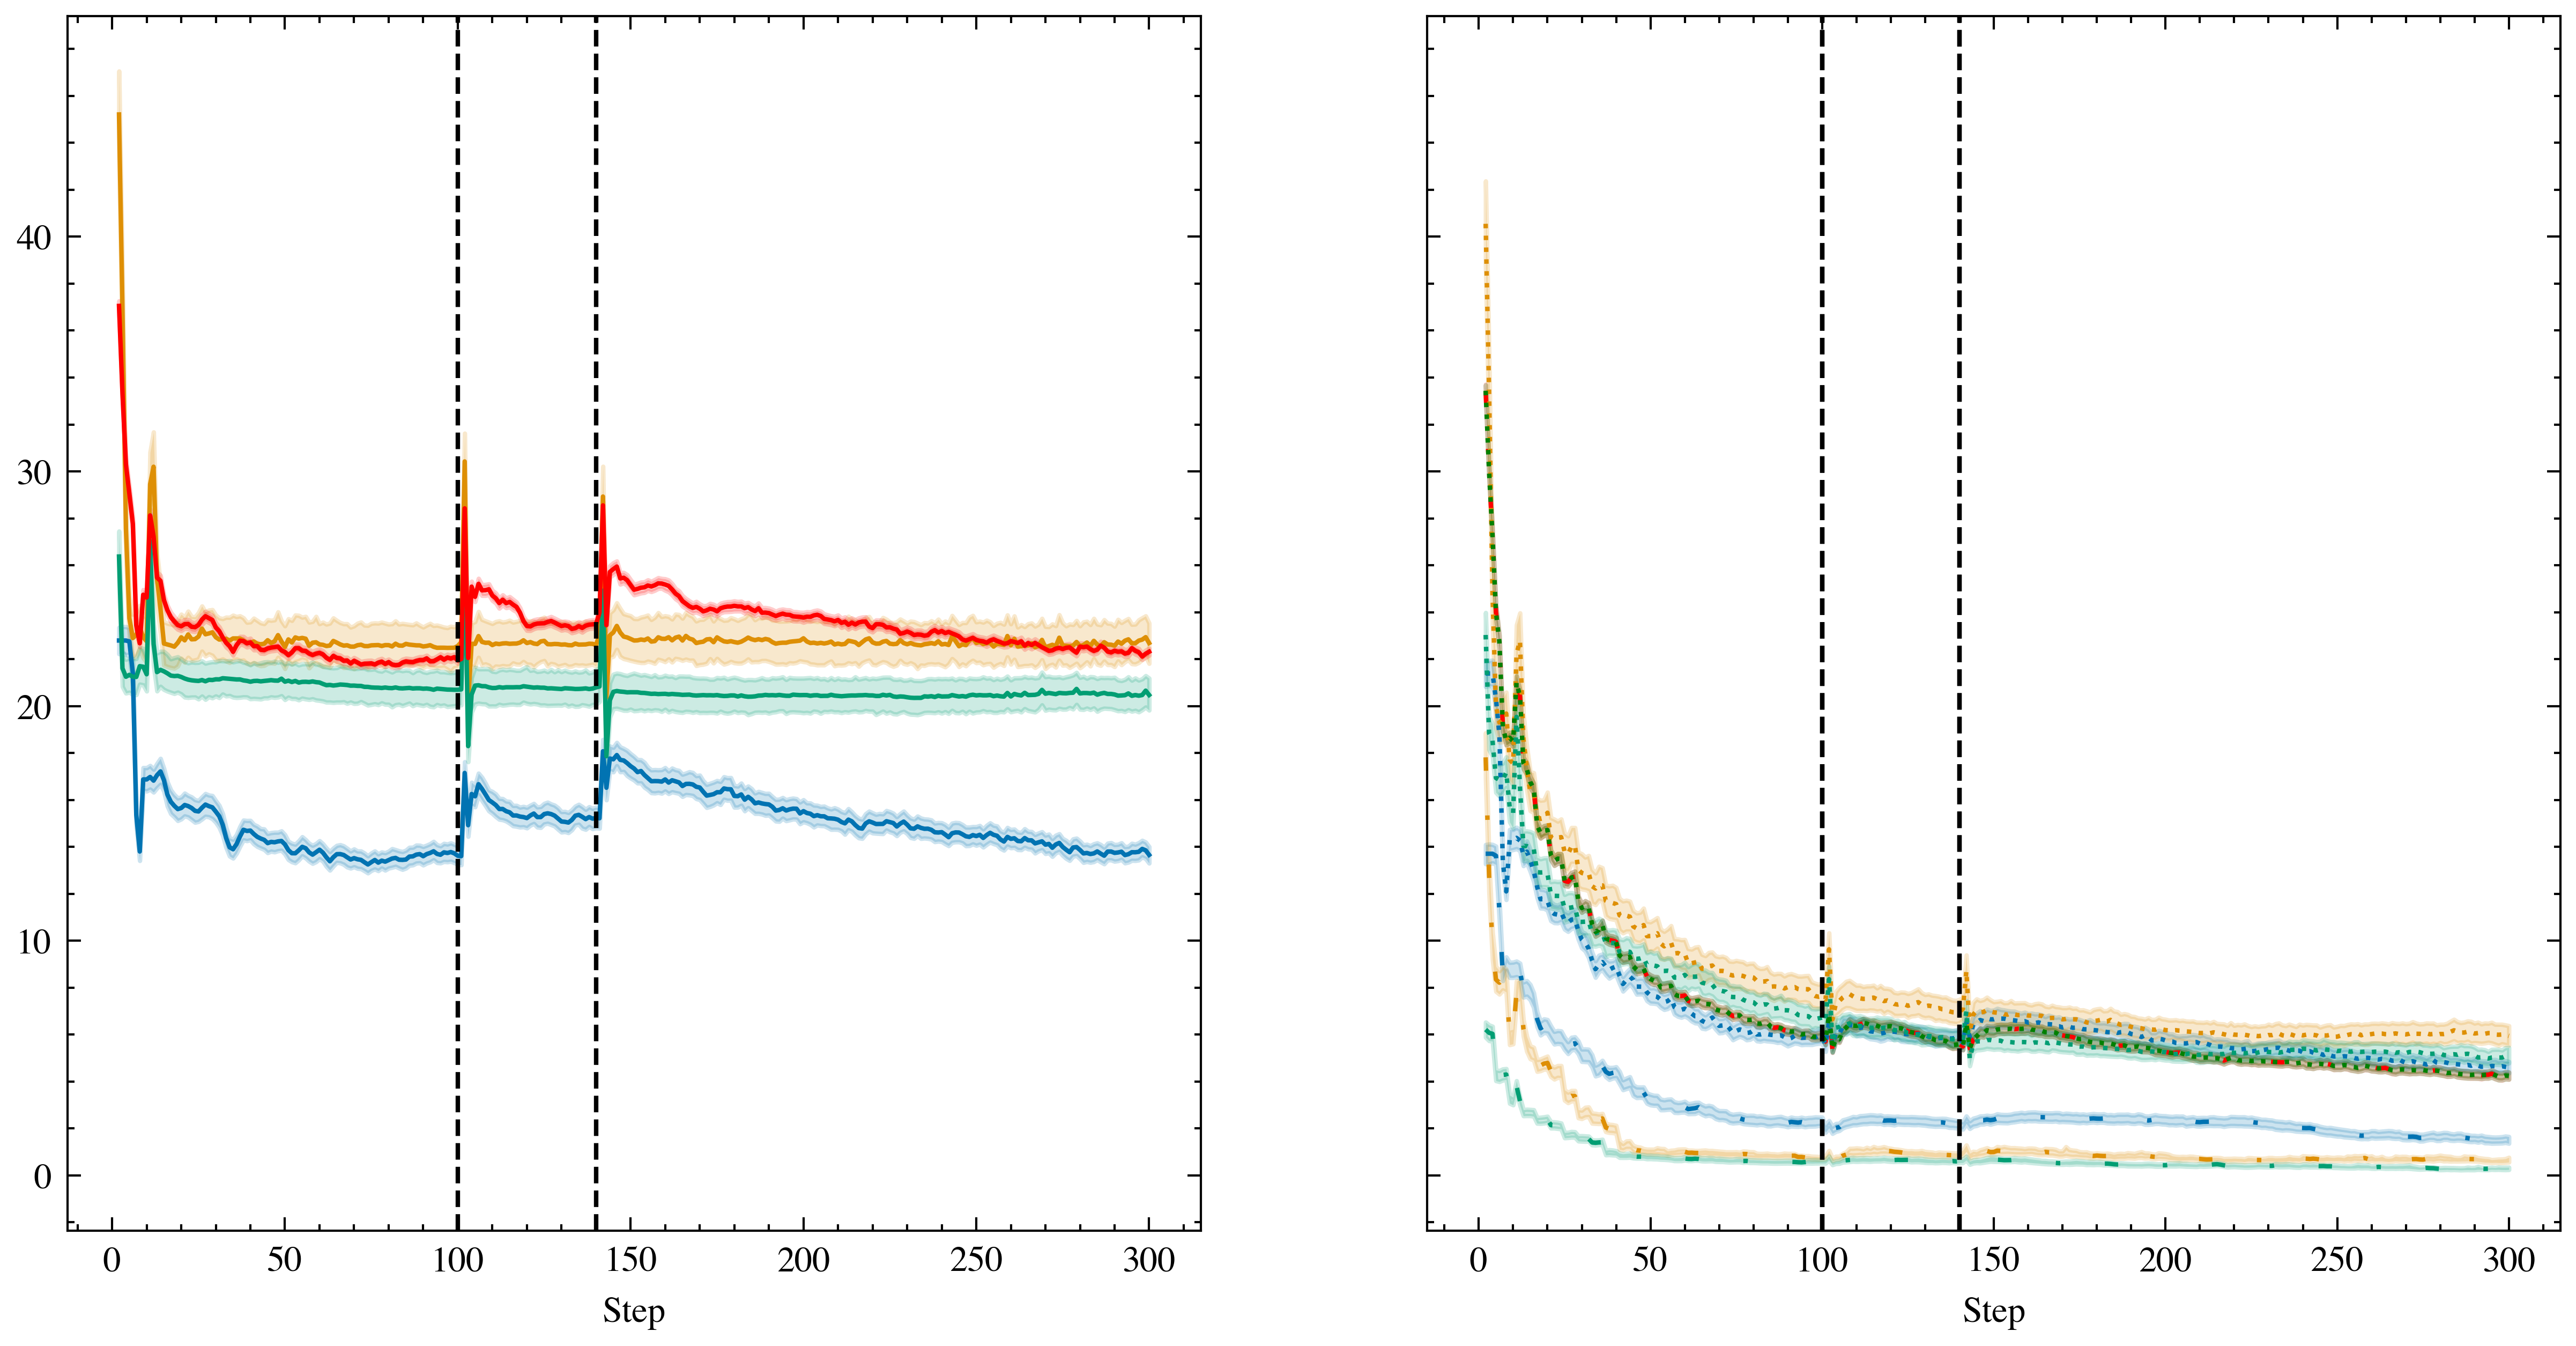

In [ ]:
linestyles = ['solid', (0, (3, 10, 1, 10)), 'dotted']
palette_1 = sns.color_palette("colorblind", 3)
palette_2 = sns.color_palette("colorblind", 1)
font = 11
fig, axes = plt.subplots( 1,2, sharey = True, figsize = (10,5))
a =  0
for i in range(len(at_risk_df_list)):
    if i %2 == 0 and i < 2:

       legend = False
       sns.stackplot()
       #sns.lineplot(at_risk_df_list[i + 1]['Step'], at_risk_df_list[i + 1]['Damage_coeff'] * at_risk_df_list[i + 1]['House_value'] / at_risk_df_list[i + 1]['Wage'] , hue = at_risk_df_list[i + 1]['Education'], palette =palette_1, ci=95, linestyle = linestyles[a], legend=legend, ax= axes[0] )
       #sns.lineplot(at_risk_df_list_homo[a]['Step'], at_risk_df_list_homo[a]['Damage_coeff'] * at_risk_df_list_homo[a]['House_value'] / at_risk_df_list_homo[a]['Wage'], palette =palette_2, ci=95, linestyle = linestyles[a], legend=legend, ax= axes[0] )
       axes[0].axvline(x = 100, linestyle = 'dashed')
       axes[0].axvline(x = 140, linestyle = 'dashed')
       a += 1
    if i %2 == 0 and i >= 2:
       legend = False
       sns.lineplot(at_risk_df_list[i + 1]['Step'], at_risk_df_list[i + 1]['Damage_coeff'] * at_risk_df_list[i + 1]['House_value'] / at_risk_df_list[i + 1]['Wage'] , hue = at_risk_df_list[i + 1]['Education'], palette =palette_1, ci=95, linestyle = linestyles[a], legend=legend, ax= axes[1] )
       sns.lineplot(at_risk_df_list_homo[a]['Step'], at_risk_df_list_homo[a]['Damage_coeff'] * at_risk_df_list_homo[a]['House_value'] / at_risk_df_list_homo[a]['Wage'], palette =palette_2, ci=95, linestyle = linestyles[a], legend=legend, ax= axes[1] )
       axes[1].axvline(x = 100, linestyle = 'dashed')
       axes[1].axvline(x = 140, linestyle = 'dashed')
       a += 1
plt.plot(0,0, label = "Low adaptive capacity", linestyle =linestyles[0], color = palette_1[0] )
plt.plot(0,0, label = "Medium adaptive capacity", linestyle =linestyles[0], color = palette_1[1] )
plt.plot(0,0, label = "High adaptive capacity", linestyle =linestyles[0], color = palette_1[2] )
plt.plot(0,0, label = "No adaptation - Heterogenous", linestyle =linestyles[0], color = 'black' )
plt.plot(0,0, label = "EU - Heterogenous", linestyle =linestyles[1], color = 'black' )
plt.plot(0,0, label = "Extended PMT - Heterogenous", linestyle =linestyles[2], color = 'black' )

axes[0].set_ylabel('Potential damage normalized by income', fontsize = font)
plt.xlabel('Step', fontsize = font)
plt.legend( loc = 'best', fontsize = font -1)

#,bbox_to_anchor=(0.5, 0.6)

In [ ]:
dataset_big = pd.concat([at_risk_df_list[1], at_risk_df_list[3], at_risk_df_list[5]])

In [ ]:
a  = dataset_big.loc[dataset_big['Theory'] == 'No adaptation']

Step  AgentID  Net worth  At_risk  Education   Wage  Damage_coeff  \
6009         2      260   0.579000     True        2.0  0.500          0.85   
6069         2      320   0.735000     True        2.0  0.500          0.85   
6099         2      350   0.069000     True        2.0  0.500          0.85   
6119         2      370   3.633400     True        4.0  1.063          0.85   
6169         2      420   0.331000     True        2.0  0.500          0.85   
...        ...      ...        ...      ...        ...    ...           ...   
45878490   300     7260   0.788825     True        2.0  1.349          0.85   
45878530   300     7310   1.835900     True        3.0  1.534          0.85   
45878560   300     7340   2.016975     True        2.0  1.285          0.85   
45878601   300     7400   0.000000     True        2.0  0.760          0.85   
45878611   300     7410   0.596875     True        3.0  1.305          0.85   

          Monetary_damage  House_value         Theory  
6009                  0.0     4.000000  No adaptation  
6069                  0.0    27.218279  No adaptation  
6099                  0.0    12.892869  No adaptation  
6119                  0.0    15.757951  No adaptation  
6169                  0.0    10.027787  No adaptation  
...                   ...          ...            ...  
45878490              0.0    26.129548  No adaptation  
45878530              0.0    69.678794  No adaptation  
45878560              0.0    27.000533  No adaptation  
45878601              0.0     6.080000  No adaptation  
45878611              0.0    19.597161  No adaptation  

[1803147 rows x 10 columns]

/Users/ataberna/opt/anaconda3/envs/gds/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/ataberna/opt/anaconda3/envs/gds/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


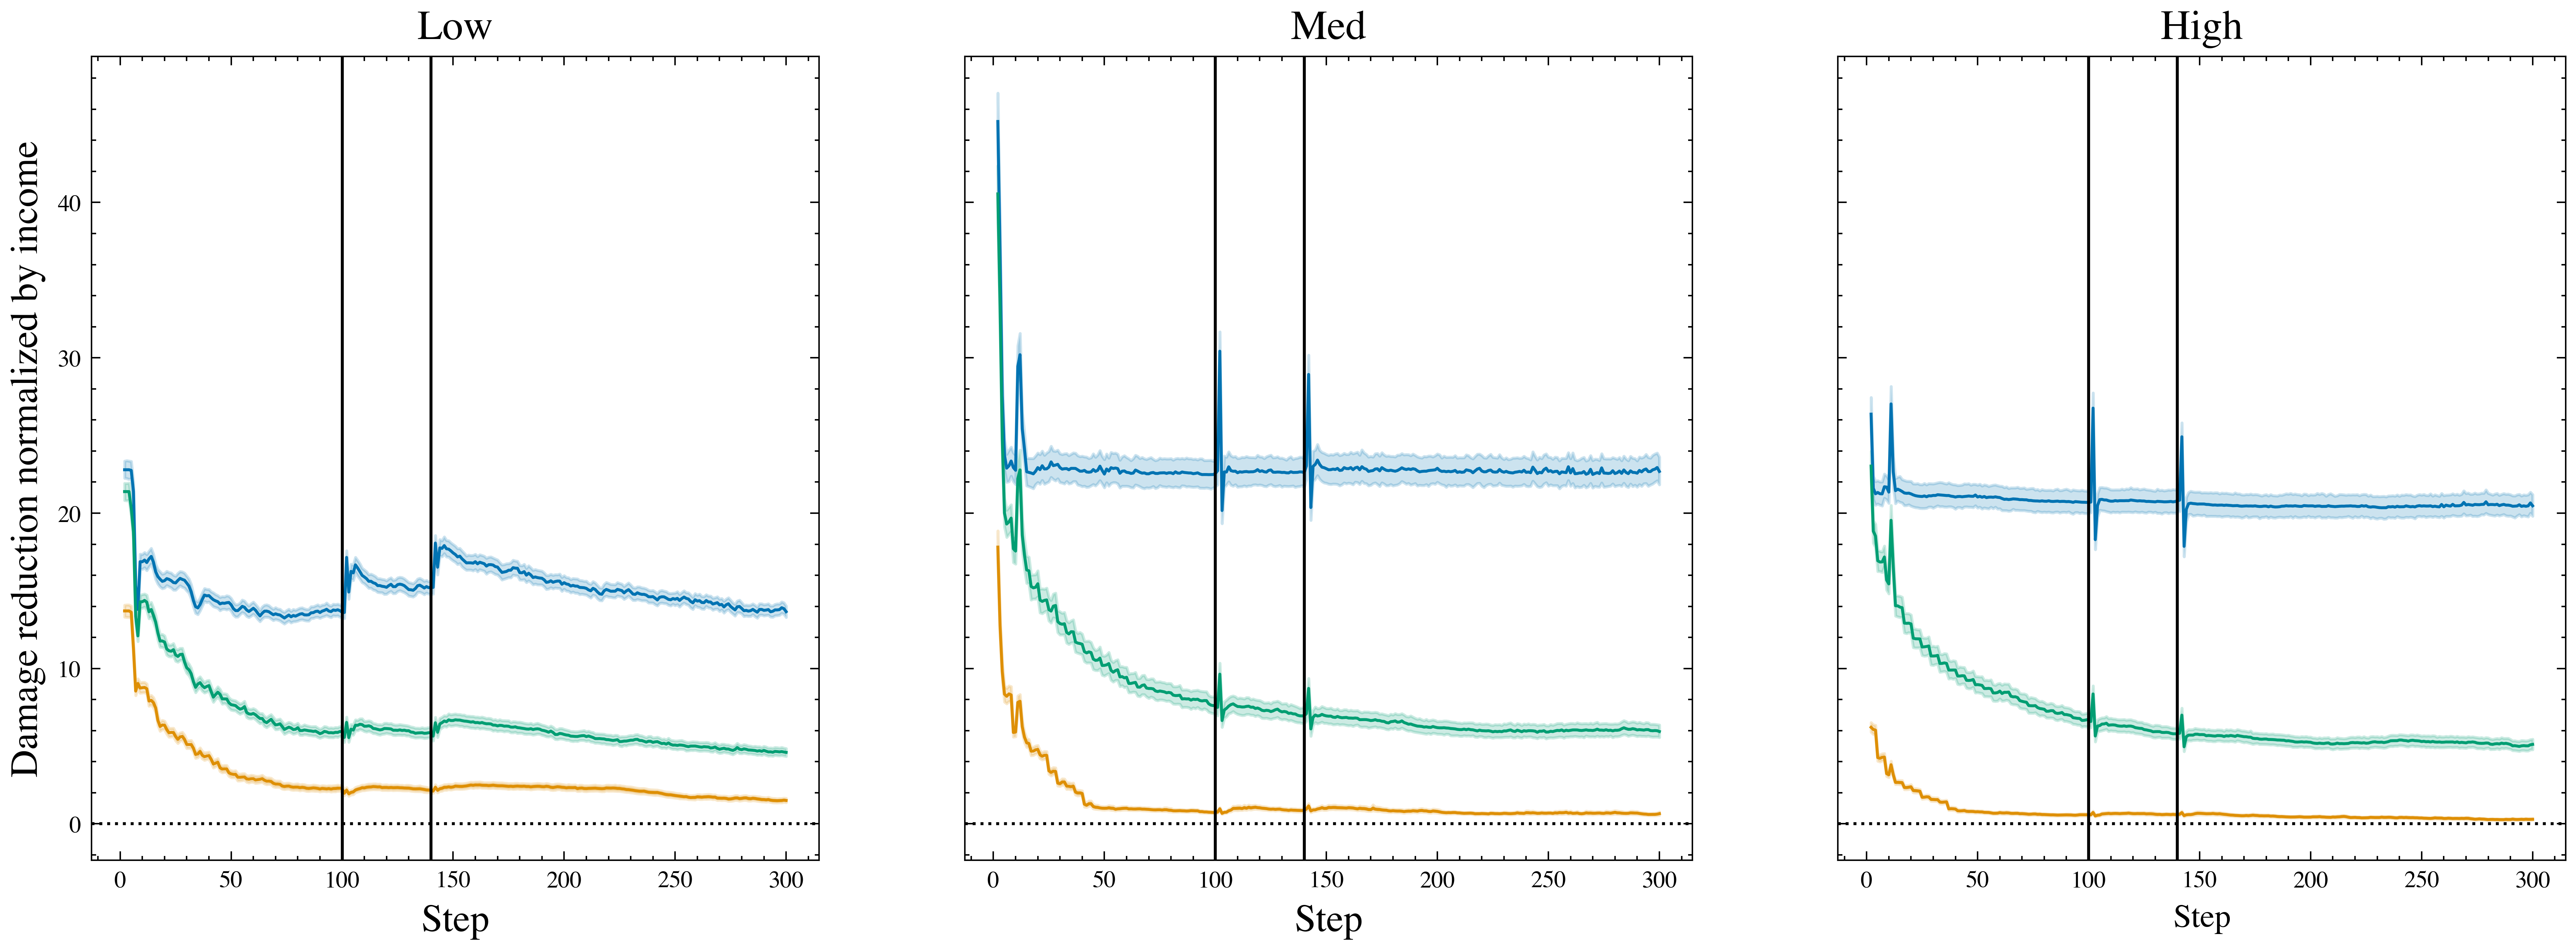

In [ ]:
titles = ['Low', 'Med', 'High']
linestyles = ['solid', (0, (3, 10, 1, 10)), 'dotted']
palette_1 = sns.color_palette("colorblind", 3)
font = 11
fig, axes = plt.subplots( 1,3, sharey = True, figsize = (15,5))
a =  0
for i in range(3):
   # if i %2 == 0:
       dataset_trial = dataset_big.loc[dataset_big['Education'] == a + 2]
       dataset_no_cca = dataset_trial.loc[dataset_trial['Theory'] == 'No adaptation']
       legend = False
       sns.lineplot(dataset_trial['Step'],  (dataset_trial['Damage_coeff'] * dataset_trial['House_value'] / dataset_trial['Wage']) , hue = dataset_trial['Theory'], palette =palette_1, ci=95, linestyle = 'solid', legend=legend, ax = axes[a] )
       # sns.lineplot(dataset_no_cca['Step'],  (dataset_no_cca['Damage_coeff'] * dataset_no_cca['House_value'] / dataset_no_cca['Wage']) , hue = dataset_trial['Theory'], palette =palette_1, ci=95, linestyle = 'solid', legend=legend, ax = axes[a] )
       axes[a].axvline(x = 100, linestyle = 'solid')
       axes[a].axvline(x = 140, linestyle = 'solid')
       axes[a].axhline(y = 0, linestyle = 'dotted')
       axes[a].set_title(titles[a], fontsize = font + 3)
       axes[0].set_ylabel('Damage reduction normalized by income', fontsize = font + 2)
       axes[a].set_xlabel('Step', fontsize = font + 2)
       a += 1
#plt.plot(0,0, label = "Low adaptive capacity", linestyle =linestyles[0], color = palette_1[0] )
#plt.plot(0,0, label = "Medium adaptive capacity", linestyle =linestyles[0], color = palette_1[1] )
#plt.plot(0,0, label = "High adaptive capacity", linestyle =linestyles[0], color = palette_1[2] )
#plt.plot(0,0, label = "No adaptation - Heterogenous", linestyle =linestyles[0], color = 'black' )
#plt.plot(0,0, label = "EU - Heterogenous", linestyle =linestyles[1], color = 'black' )
#plt.plot(0,0, label = "Extended PMT - Heterogenous", linestyle =linestyles[2], color = 'black' )

plt.ylabel('Potential damage normalized by income', fontsize = font)
plt.xlabel('Step', fontsize = font)
plt.legend( loc = 'best',bbox_to_anchor=(0.5, 0.6), fontsize = font -1)

In [ ]:
red_at_risk_df_list = []
red_at_risk_df_list_homo = []
homo = 0
for i in range(len(micro_dfs)):
    at_risk_df =  micro_dfs[i].loc[(micro_dfs[i]['At_risk'] == True) & (micro_dfs[i]['Education'] != 1) & (micro_dfs[i]['Step'] > 95) &  (micro_dfs[i]['Step'] < 200) &  (micro_dfs_homo[i]['AgentID'] % 10 == 0)]# & (datasets[i]['Flooded'] == True)]
    #at_risk_df['Theory'] = theories[i]
    red_at_risk_df_list.append(at_risk_df)
    
    if i % 2 == 0:

        at_risk_df_homo =  micro_dfs_homo[homo].loc[(micro_dfs_homo[homo]['At_risk'] == True) & (micro_dfs_homo[homo]['Education'] != 1) & (micro_dfs_homo[homo]['Step'] >1 ) & (micro_dfs[i]['Step'] > 95) &  (micro_dfs[i]['Step'] < 200) &  (micro_dfs_homo[homo]['AgentID'] % 10 == 0) ]
        #at_risk_df_homo['Theory'] = theories[homo]
        red_at_risk_df_list_homo.append(at_risk_df_homo)

        homo+=1 

IndexError: list index out of range

: 

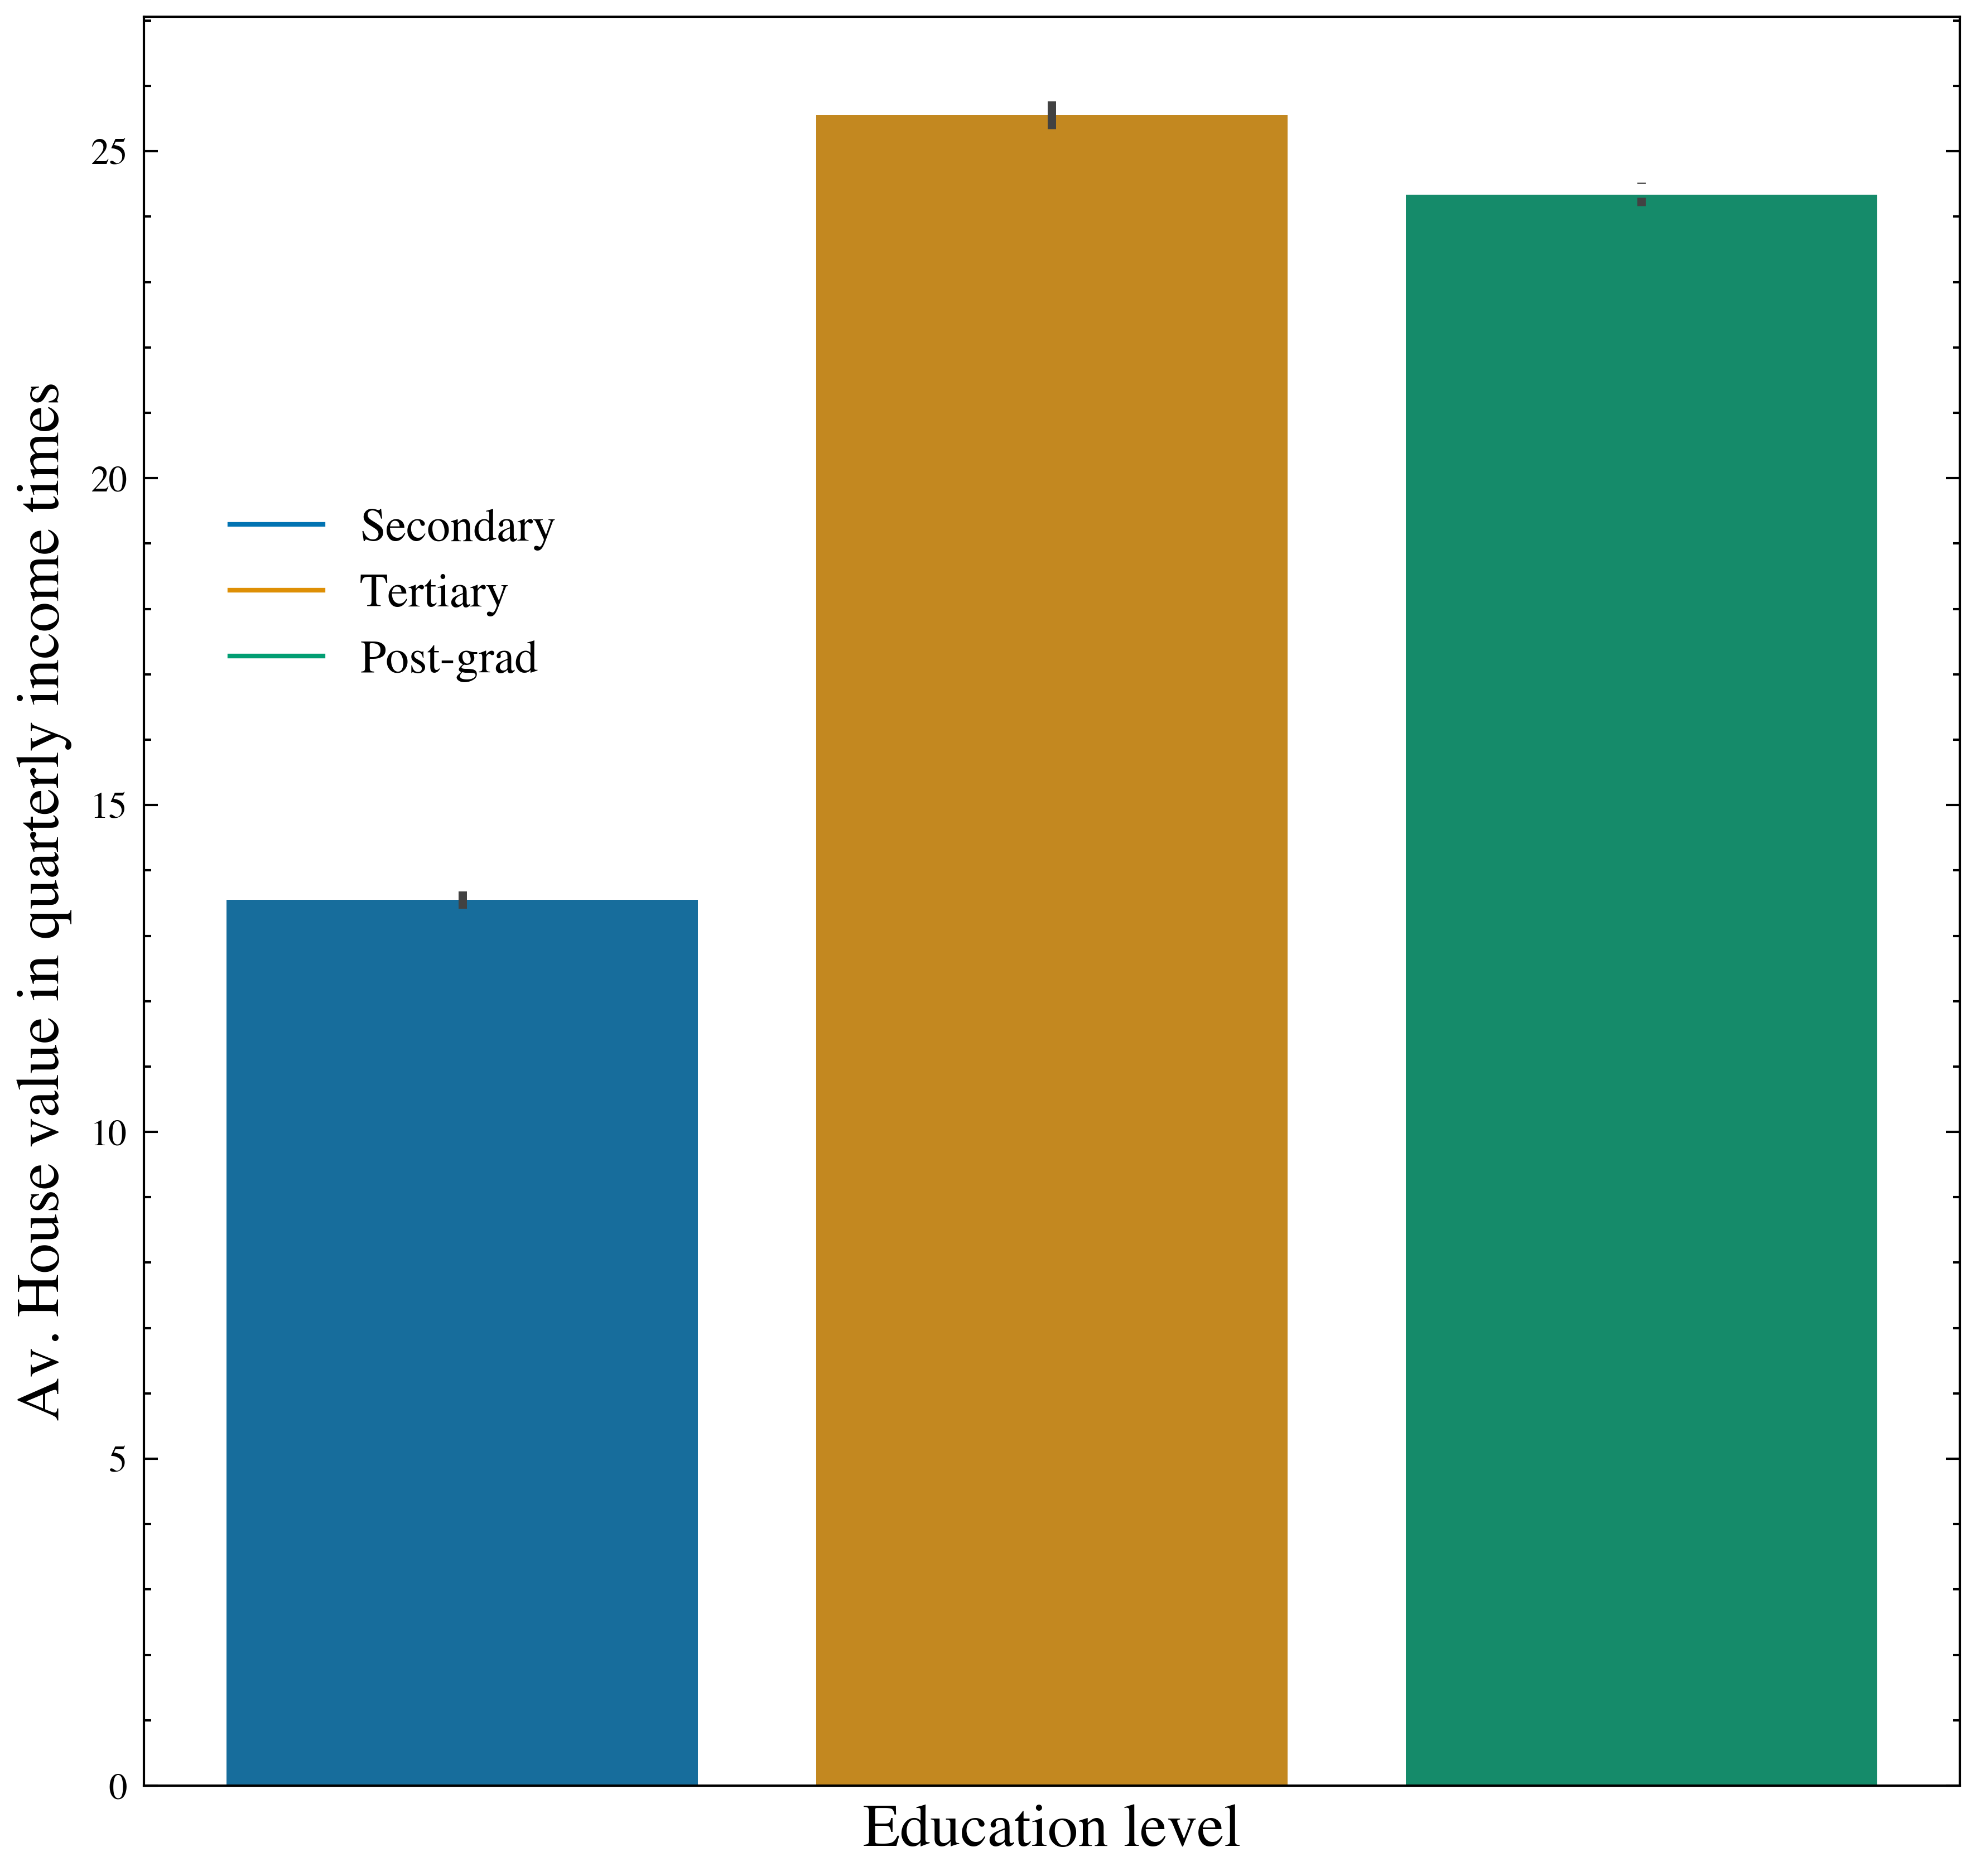

In [ ]:
linestyles = ['solid', (0, (3, 10, 1, 10)), 'dotted']
palette_1 = sns.color_palette("colorblind", 3)
font = 11
fig, axes = plt.subplots( 1,1, sharey = True, figsize = (7,7))
sns.barplot(  data = red_at_risk_df_list[0] , y = red_at_risk_df_list[0]['House_wage_ratio'], x = red_at_risk_df_list[0]["Education"], palette =palette_1)
plt.plot(0,0, label = "Low adaptive capacity", linestyle =linestyles[0], color = palette_1[0] )
plt.plot(0,0, label = "Medium adaptive capacity", linestyle =linestyles[0], color = palette_1[1] )
plt.plot(0,0, label = "High adaptive capacity", linestyle =linestyles[0], color = palette_1[2] )
plt.ylabel('Av. House value normalized by income', fontsize = font + 2)
plt.xlabel('Education level', fontsize = font + 2)
plt.xticks([])
plt.legend( loc = 'best',bbox_to_anchor=(0.25, 0.6), fontsize = font -1)

In [ ]:
titles = ['No adaptation - Heterogenous', 'EU - Heterogenous', 'Extended PMT - Heterogenous']
linestyles = ['solid', (0, (3, 10, 1, 10)), 'dotted']
palette_1 = sns.color_palette("colorblind", 3)
font = 11
fig, axes = plt.subplots( 1,3, figsize = (15,5))
a =  0
for i in range(len(red_at_risk_df_list)):
    if i %2 == 0:
       print(i)
       legend = False
       sns.lineplot(red_at_risk_df_list_homo[a]['Step'], (red_at_risk_df_list_homo[a]['Net worth']- red_at_risk_df_list_homo[a]['Monetary_damage'])/red_at_risk_df_list_homo[a]['Wage'],linestyle = 'solid' ,palette ='darkred', ci=95, legend=legend, ax= axes[a])
       sns.lineplot(red_at_risk_df_list[i + 1]['Step'], (red_at_risk_df_list[i + 1]['Net worth']- red_at_risk_df_list[i + 1]['Monetary_damage'])/red_at_risk_df_list[i + 1]['Wage'], hue = red_at_risk_df_list[i + 1]['Education'],linestyle = 'solid' ,palette =palette_1, ci=95, legend=legend, ax= axes[a])
       sns.lineplot(red_at_risk_df_list[i]['Step'], (red_at_risk_df_list[i]['Net worth']- red_at_risk_df_list[i]['Monetary_damage'])/red_at_risk_df_list[i]['Wage'], hue = red_at_risk_df_list[i]['Education'], palette =palette_1, ci=None, linestyle = 'dashed', legend=legend, ax= axes[a])
       axes[a].axvline(x = 100, linestyle = 'solid')
       axes[a].axvline(x = 140, linestyle = 'solid')
       axes[a].axhline(y = 0, linestyle = 'dotted')
       axes[a].set_title(titles[a], fontsize = font + 3)
       axes[0].set_ylabel('Liquid resources to wage ratio', fontsize = font + 2)
       axes[a].set_xlabel('Step', fontsize = font + 2)
       if a > 0:
           axes[a].set_ylim([-1, 10])

       a += 1


plt.plot(100,0, label = "Low adaptive capacity", linestyle =linestyles[0], color = palette_1[0] )
plt.plot(100,0, label = "Medium adaptive capacity", linestyle =linestyles[0], color = palette_1[1] )
plt.plot(100,0, label = "High adaptive capacity", linestyle =linestyles[0], color = palette_1[2] )
plt.plot(100,0, label = "Homogenous adaptive capacity", linestyle =linestyles[0], color = 'darkred' )
plt.plot(100,0, label = "Two floods", linestyle ='solid', color = 'black' )
plt.plot(100,0, label = "Zero liquid resources", linestyle ='dotted', color = 'black' )
plt.plot(100,0, label = "Counterfactual" "\n" "with no floods", linestyle ='dashed', color = 'black' )

#plt.plot(0,0, label = "No adaptation", linestyle =linestyles[0], color = 'black' )
#plt.plot(0,0, label = "Expected utility (EU)", linestyle =linestyles[1], color = 'black' )
#plt.plot(0,0, label = "Protection Motivation Theory (PMT) ", linestyle =linestyles[2], color = 'black' )


plt.legend( loc='center', bbox_to_anchor =(-0.5, 0.2), fontsize = font)

NameError: name 'sns' is not defined

In [ ]:
at_risk_df_list[0]

/Users/ataberna/opt/anaconda3/envs/gds/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/ataberna/opt/anaconda3/envs/gds/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/ataberna/opt/anaconda3/envs/gds/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result i

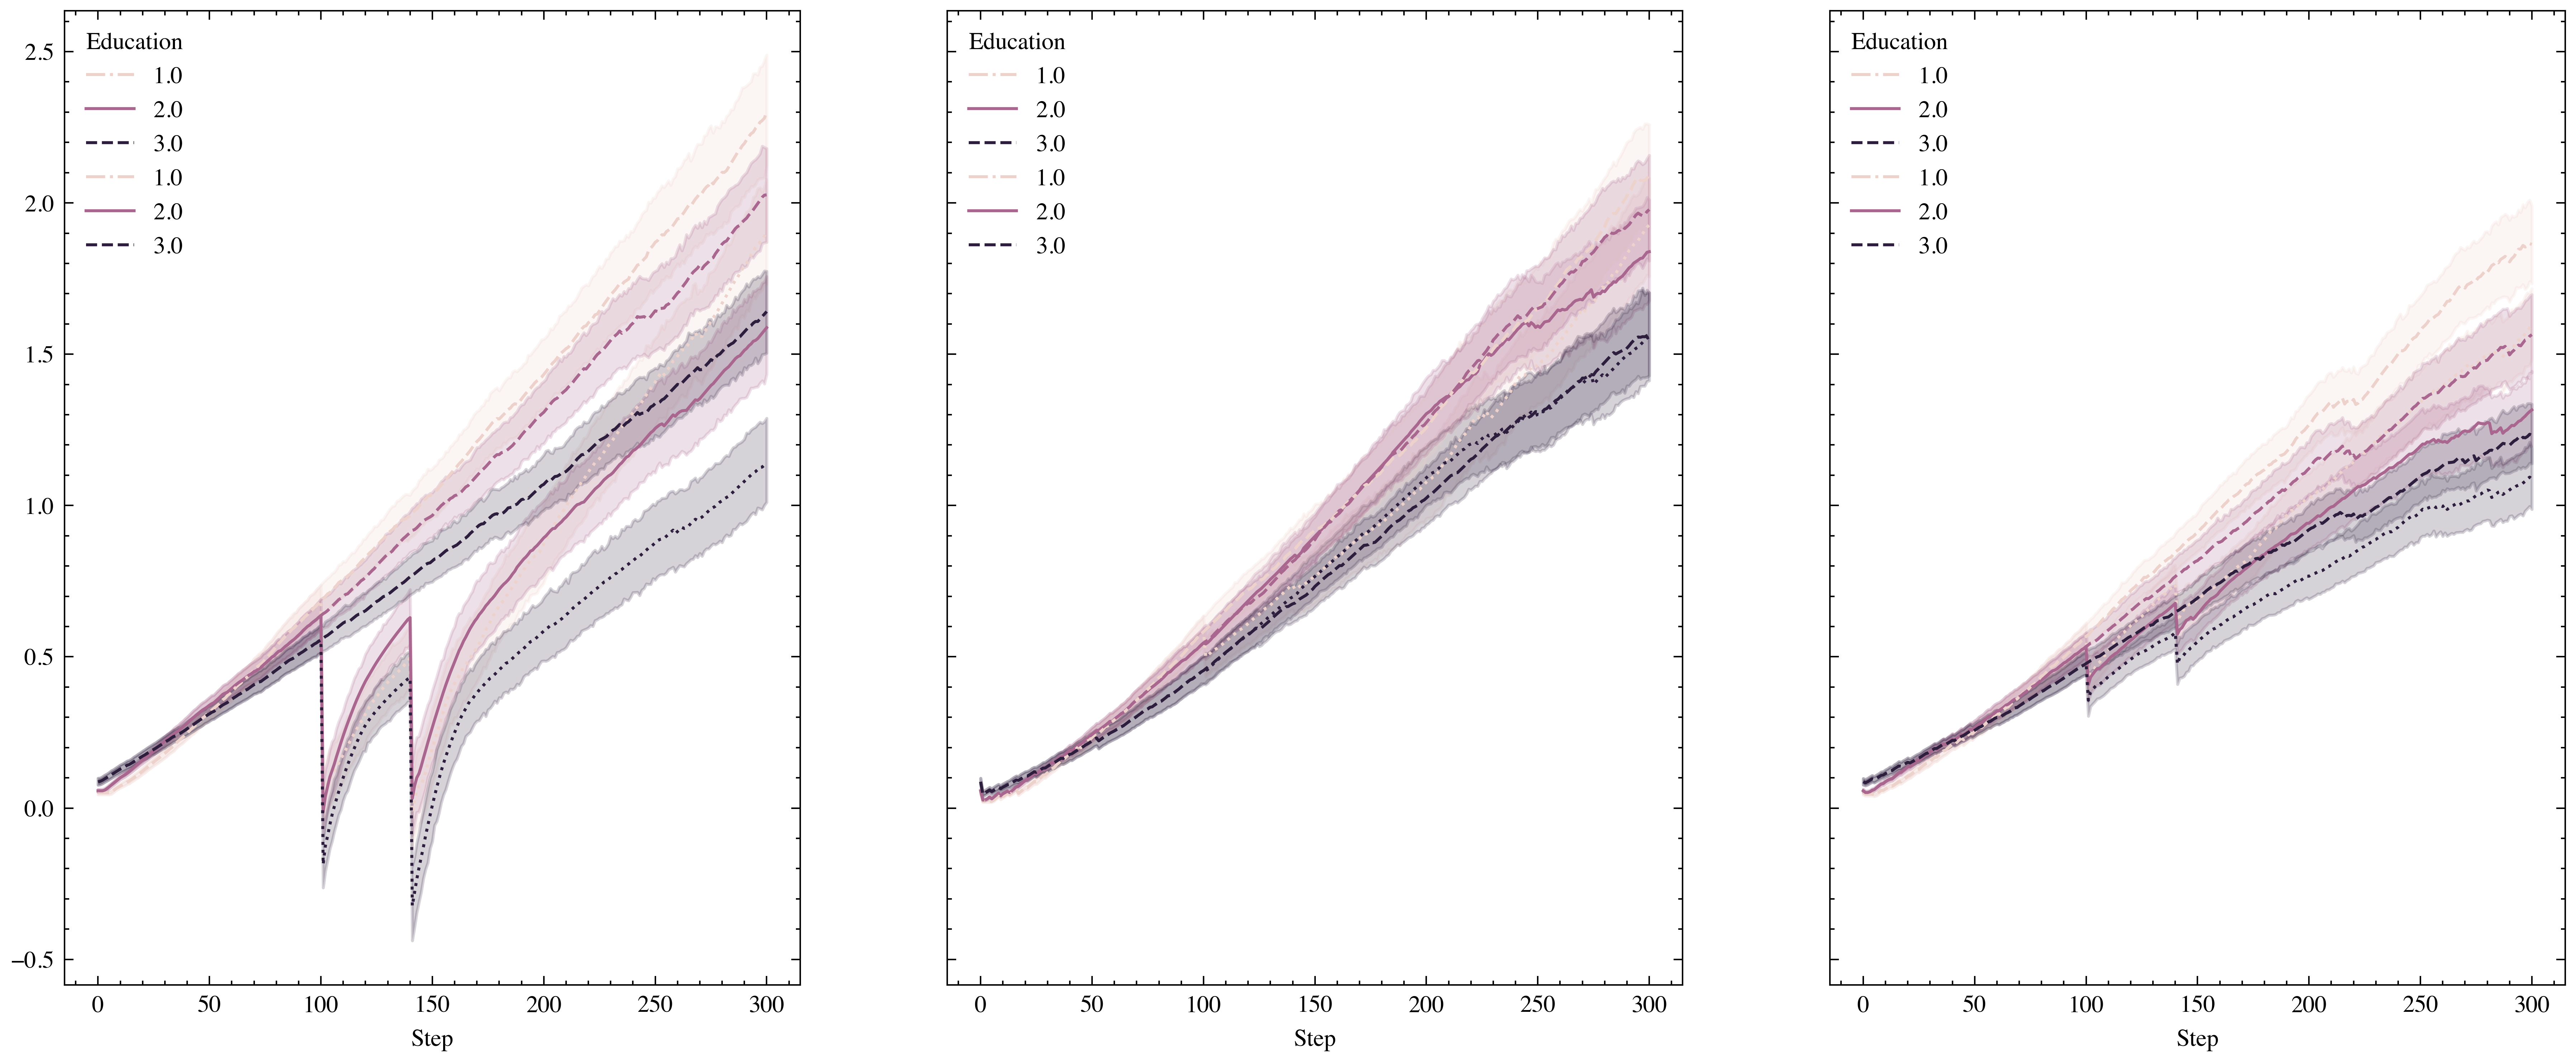

In [ ]:
fig, axes = plt.subplots( 1,3, sharey = True, figsize = (15,6))
a =  0
for i in range(len(at_risk_df_list)):
    if i %2 == 0:
       legend = False 
       sns.lineplot(at_risk_df_list[i + 1]['Step'], (at_risk_df_list[i + 1]['Net worth']- at_risk_df_list[i + 1]['Monetary_damage'])/at_risk_df_list[i + 1]['House_wage_ratio'], hue = at_risk_df_list[i + 1]['Education'], ax= axes[a])
       sns.lineplot(at_risk_df_list[i]['Step'], (at_risk_df_list[i]['Net worth']- at_risk_df_list[i]['Monetary_damage'])/at_risk_df_list[i]['House_wage_ratio'], hue = at_risk_df_list[i]['Education'],linestyle = '--', ax= axes[a])
       a += 1

In [ ]:
fig, axes = plt.subplots( 1,3, sharey = True, figsize = (15,6))
a =  0
for i in range(len(at_risk_df_list)):
    if i %2 == 0:
       legend = False 
       sns.lineplot(at_risk_df_list[i + 1]['Step'], (at_risk_df_list[i + 1]['Net worth']- at_risk_df_list[i + 1]['Monetary_damage'])/at_risk_df_list[i + 1]['House_wage_ratio'], hue = at_risk_df_list[i + 1]['Education'], ax= axes[a])
       sns.lineplot(at_risk_df_list[i]['Step'], (at_risk_df_list[i]['Net worth']- at_risk_df_list[i]['Monetary_damage'])/at_risk_df_list[i]['House_wage_ratio'], hue = at_risk_df_list[i]['Education'],linestyle = '--', ax= axes[a])
       a += 1

In [ ]:
fig, axes = plt.subplots( 2,2, sharey = True, figsize = (10,10))
for i in range(len(at_risk_df_list)):
    j = 0
    legend = True
    if i > 1:
        j = 1
    if i > 0:   
       legend = False
       sns.lineplot(at_risk_df_list[i]['Step'], (at_risk_df_list[i]['Net worth']- at_risk_df_list[i]['Monetary_damage']), hue = at_risk_df_list[i]['Education'], ax= axes[i%2][j])

In [ ]:
stop

sns.lineplot(df_flooded['Step'], df_flooded['Monetary_damage']/ df_flooded['House_wage_ratio'], hue = df_flooded['Education'])

In [ ]:

node_label = ["A1", "A2", "A3", "A4","A5", "B1", "B2","B3", "B4", "B5","C1", "C2", "C3", "C4","C5" ]
node_dict = {y:x for x, y in enumerate(node_label)}
node_dict

{'A1': 0,
 'A2': 1,
 'A3': 2,
 'A4': 3,
 'A5': 4,
 'B1': 5,
 'B2': 6,
 'B3': 7,
 'B4': 8,
 'B5': 9,
 'C1': 10,
 'C2': 11,
 'C3': 12,
 'C4': 13,
 'C5': 14}

In [ ]:

source = []
for i in range(51):
    if i < 5:
        source.append('A1')
    elif i > 5 and i <=10:
        source.append('A2')
    elif i > 10 and i <= 15:
        source.append('A3')
    elif i > 15 and i <= 20:
        source.append('A4')
    elif i > 20 and i <= 25:
        source.append('A5')
    elif i > 25 and i <= 30:
        source.append('B1')
    elif i > 30 and i <=35:
        source.append('B2')
    elif i > 35 and i <= 40:
        source.append('B3')
    elif i > 40 and i <= 45:
        source.append('B4')
    elif i > 45 and i <= 50:
        source.append('A5')


target_1 = []
for i in range(25):
    if i % 5 == 0:
        target_1.append('B1')
    elif i%5 == 1:
        target_1.append('B2')
    elif i%5 == 2:
        target_1.append('B3')
    elif i%5 == 3:
        target_1.append('B4')
    elif i%5 == 4:
        target_1.append('B5')
target_2 = []
for i in range(25):
    if i % 5 == 0:
        target_2.append('C1')
    elif i%5 == 1:
        target_2.append('C2')
    elif i%5 == 2:
        target_2.append('C3')
    elif i%5 == 3:
        target_2.append('C4')
    elif i%5 == 4:
        target_2.append('C5')   

#target = ['B1','B2','B3','B1','B2','B3','C1','C1','C2','C1','C2'] 
#values = [ 10, 5, 15, 5, 20, 45, 15, 20, 5, 30, 30 ]
target = target_1 + target_2

In [ ]:
df = pd.DataFrame(target)
df_2 = pd.DataFrame(source)

In [ ]:
df_2

0
0   A1
1   A1
2   A1
3   A1
4   A1
5   A2
6   A2
7   A2
8   A2
9   A2
10  A3
11  A3
12  A3
13  A3
14  A3
15  A4
16  A4
17  A4
18  A4
19  A4
20  A5
21  A5
22  A5
23  A5
24  A5
25  B1
26  B1
27  B1
28  B1
29  B1
30  B2
31  B2
32  B2
33  B2
34  B2
35  B3
36  B3
37  B3
38  B3
39  B3
40  B4
41  B4
42  B4
43  B4
44  B4
45  A5
46  A5
47  A5
48  A5
49  A5

In [ ]:
len(target), len(source)

(52, 50)

In [ ]:
pre_flood_df_list = []
for i in range(len(at_risk_df_list)):
    pre_flood_df =  at_risk_df_list[i].loc[at_risk_df_list[i]['Step'] == 99]
    pre_flood_df['Quintile_pre_flood'] = None
    pre_flood_df_list.append(pre_flood_df)

/var/folders/33/dr4cqnzj0597_7n7kbsrfht8cdq0jk/T/ipykernel_33904/1314772522.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
quintiles_list = []
for i in range(len(pre_flood_df_list)):
 #+ benchmark['House_wage_ratio'] 
    quintiles = pre_flood_df_list[i]['Net worth'].quantile([0.2,0.4,0.6,0.8])
    quintiles_list.append(quintiles)

In [ ]:
datasets_quintiles_list = []
for i in range(len(pre_flood_df_list)):
    dataset = pre_flood_df_list [i]
    variable = 'Quintile_pre_flood'
    variable_2 ='Net worth'
    a = quintiles_list[i]
    for x,line in dataset.iterrows():
    # print(x)
        if line[variable_2] <= a.iloc[0]:
            dataset[variable][x] = 1
        elif line[variable_2] > a.iloc[0] and line[variable_2] <= a.iloc[1] :
            dataset[variable][x] = 2
        elif line[variable_2] > a.iloc[1] and line[variable_2] <= a.iloc[2] :
            dataset[variable][x] = 3
        elif line[variable_2] > a.iloc[2] and line[variable_2] <= a.iloc[3] :
            dataset[variable][x] = 4
        elif line[variable_2] > a.iloc[3] :
            dataset[variable][x] = 5

/var/folders/33/dr4cqnzj0597_7n7kbsrfht8cdq0jk/T/ipykernel_33904/1266622156.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/33/dr4cqnzj0597_7n7kbsrfht8cdq0jk/T/ipykernel_33904/1266622156.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/33/dr4cqnzj0597_7n7kbsrfht8cdq0jk/T/ipykernel_33904/1266622156.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/33/dr4cqnzj0597_7n7kbsrfht8cdq0jk/T/ipy

In [ ]:
dataset

In [ ]:
post_flood_df_list = []
for i in range(len(at_risk_df_list)):
    post_flood_df =  at_risk_df_list[i].loc[at_risk_df_list[i]['Step'] == 110]
    post_flood_df['Quintile_post_flood'] = None
    post_flood_df_list.append(post_flood_df)

/var/folders/33/dr4cqnzj0597_7n7kbsrfht8cdq0jk/T/ipykernel_33904/2938196773.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
post_2floods_df_list = []
for i in range(len(at_risk_df_list)):
    post_flood_df =  at_risk_df_list[i].loc[at_risk_df_list[i]['Step'] == 150]
    post_flood_df['Quintile_post_2floods'] = None
    post_2floods_df_list.append(post_flood_df)

/var/folders/33/dr4cqnzj0597_7n7kbsrfht8cdq0jk/T/ipykernel_33904/217030740.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:

quintiles_list_post = []
for i in range(len(post_flood_df_list)):
 #+ benchmark['House_wage_ratio'] 
    quintiles = post_flood_df_list[i]['Net worth'].quantile([0.2,0.4,0.6,0.8])
    quintiles_list_post.append(quintiles)

In [ ]:

quintiles_list_post_2 = []
for i in range(len(post_2floods_df_list)):
 #+ benchmark['House_wage_ratio'] 
    quintiles = post_2floods_df_list[i]['Net worth'].quantile([0.2,0.4,0.6,0.8])
    quintiles_list_post_2.append(quintiles)

In [ ]:

for i in range(len(post_flood_df_list)):
    dataset = post_flood_df_list [i]
    variable = 'Quintile_post_flood'
    variable_2 ='Net worth'
    a = quintiles_list_post[i]
    for x,line in dataset.iterrows():
    # print(x)
        if line[variable_2] <= a.iloc[0]:
            dataset[variable][x] = 1
        elif line[variable_2] > a.iloc[0] and line[variable_2] <= a.iloc[1] :
            dataset[variable][x] = 2
        elif line[variable_2] > a.iloc[1] and line[variable_2] <= a.iloc[2] :
            dataset[variable][x] = 3
        elif line[variable_2] > a.iloc[2] and line[variable_2] <= a.iloc[3] :
            dataset[variable][x] = 4
        elif line[variable_2] > a.iloc[3] :
            dataset[variable][x] = 5

/var/folders/33/dr4cqnzj0597_7n7kbsrfht8cdq0jk/T/ipykernel_33904/3004221203.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/33/dr4cqnzj0597_7n7kbsrfht8cdq0jk/T/ipykernel_33904/3004221203.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/33/dr4cqnzj0597_7n7kbsrfht8cdq0jk/T/ipykernel_33904/3004221203.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/33/dr4cqnzj0597_7n7kbsrfht8cdq0jk/T/ipy

In [ ]:

for i in range(len(post_2floods_df_list)):
    dataset = post_2floods_df_list [i]
    variable = 'Quintile_post_2floods'
    variable_2 ='Net worth'
    a = quintiles_list_post_2[i]
    for x,line in dataset.iterrows():
    # print(x)
        if line[variable_2] <= a.iloc[0]:
            dataset[variable][x] = 1
        elif line[variable_2] > a.iloc[0] and line[variable_2] <= a.iloc[1] :
            dataset[variable][x] = 2
        elif line[variable_2] > a.iloc[1] and line[variable_2] <= a.iloc[2] :
            dataset[variable][x] = 3
        elif line[variable_2] > a.iloc[2] and line[variable_2] <= a.iloc[3] :
            dataset[variable][x] = 4
        elif line[variable_2] > a.iloc[3] :
            dataset[variable][x] = 5

/var/folders/33/dr4cqnzj0597_7n7kbsrfht8cdq0jk/T/ipykernel_33904/4135642025.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/33/dr4cqnzj0597_7n7kbsrfht8cdq0jk/T/ipykernel_33904/4135642025.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/33/dr4cqnzj0597_7n7kbsrfht8cdq0jk/T/ipykernel_33904/4135642025.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/33/dr4cqnzj0597_7n7kbsrfht8cdq0jk/T/ipy

In [ ]:
post_2floods_df_list[0]

Step  AgentID       Type  Net worth  House_wage_ratio  Total_damage  \
463270   150      254  Household  12.049425          4.000000           0.0   
463272   150      257  Household  12.740200          8.595246           0.0   
463277   150      265  Household  11.853525         18.623033           0.0   
463279   150      267  Household  14.547750         14.325410           0.0   
463280   150      268  Household  16.072150         20.055574           0.0   
...      ...      ...        ...        ...               ...           ...   
466571   150     4642  Household   3.402225         31.515902           0.0   
466572   150     4643  Household   0.627000         17.763508           0.0   
466574   150     4645  Household   0.000000         11.460328           0.0   
466576   150     4661  Household   1.731675         22.920656           0.0   
466580   150     4665  Household   4.993375         16.044459           0.0   

        Total_savings  Recovery_time  Repair_exp    Cons  ...  Worry  \
463270            0.0            0.0         0.0  1.1475  ...    2.0   
463272            0.0            0.0         0.0  1.2519  ...    2.0   
463277            0.0            0.0         0.0  1.0926  ...    2.0   
463279            0.0            0.0         0.0  1.3347  ...    1.0   
463280            0.0            0.0         0.0  1.3104  ...    2.0   
...               ...            ...         ...     ...  ...    ...   
466571            0.0            0.0         0.0  1.2447  ...    1.0   
466572            0.0            0.0         0.0  0.6600  ...    3.0   
466574            0.0            0.0         0.0  0.6600  ...    2.0   
466576            0.0            0.0         0.0  1.1961  ...    5.0   
466580            0.0            0.0         0.0  1.1925  ...    3.0   

        Education    SE_wet    RE_wet   Wage  Damage_coeff  Monetary_damage  \
463270        1.0  4.000000  3.666667  1.275          0.85              0.0   
463272        2.0  1.000000  5.000000  1.391          0.85              0.0   
463277        1.0  1.000000  2.333333  1.214          0.85              0.0   
463279        3.0  1.000000  1.000000  1.483          0.85              0.0   
463280        3.0  1.000000  1.333333  1.456          0.85              0.0   
...           ...       ...       ...    ...           ...              ...   
466571        3.0  1.666667  1.666667  1.383          0.85              0.0   
466572        1.0  5.000000  5.000000  0.660          0.85              0.0   
466574        1.0  1.666667  2.333333  0.660          0.85              0.0   
466576        2.0  4.333333  4.666667  1.329          0.85              0.0   
466580        2.0  1.000000  3.666667  1.325          0.85              0.0   

        Elevated  House_value  Quintile_post_2floods  
463270       0.0     5.280000                      3  
463272       0.0    11.345725                      3  
463277       0.0    24.582404                      2  
463279       0.0    18.909541                      5  
463280       0.0    26.473358                      5  
...          ...          ...                    ...  
466571       0.0    41.600991                      1  
466572       0.0    23.447831                      1  
466574       0.0    15.127633                      1  
466576       0.0    30.255266                      1  
466580       0.0    21.178686                      1  

[1363 rows x 22 columns]

In [ ]:
df_num = 5

In [ ]:
pre_flood_df_list[df_num] = pre_flood_df_list[df_num].set_index('AgentID')
post_flood_df_list[df_num] = post_flood_df_list[df_num].set_index('AgentID')
post_2floods_df_list[df_num] = post_2floods_df_list[df_num].set_index('AgentID')

In [ ]:
pre_flood_df_list[df_num]['Quintile_post_flood'] = post_flood_df_list[df_num]['Quintile_post_flood'] 
pre_flood_df_list[df_num]['Quintile_post_2floods'] = post_flood_df_list[df_num]['Quintile_post_2floods'] =  post_2floods_df_list[df_num]['Quintile_post_2floods']

In [ ]:
pre_flood_df_list[df_num] = pre_flood_df_list[df_num].dropna()

In [ ]:
values_1 = []
values_2 = []
pre_quint = 1
for i in range(25):
    
    post_quint = 1 + i%5
    if i > 4 and post_quint == 1:
        pre_quint += 1
    #if post_quint%5 == 0:
     #   pre_quint +=1 
    print(pre_quint, post_quint)
    a = pre_flood_df_list[df_num].loc[(pre_flood_df_list[df_num]['Quintile_pre_flood'] == pre_quint) & (pre_flood_df_list[df_num]['Quintile_post_flood'] == post_quint)]
    b = pre_flood_df_list[df_num].loc[(pre_flood_df_list[df_num]['Quintile_post_flood'] == pre_quint) & (pre_flood_df_list[df_num]['Quintile_post_2floods'] == post_quint)]
    values_1.append(len(a))
    values_2.append(len(b))
values = values_1 + values_2


1 1
1 2
1 3
1 4
1 5
2 1
2 2
2 3
2 4
2 5
3 1
3 2
3 3
3 4
3 5
4 1
4 2
4 3
4 4
4 5
5 1
5 2
5 3
5 4
5 5


In [ ]:
values

[132,
 28,
 18,
 40,
 0,
 59,
 36,
 22,
 68,
 35,
 11,
 45,
 32,
 42,
 95,
 21,
 56,
 39,
 43,
 53,
 9,
 50,
 107,
 26,
 39,
 159,
 41,
 32,
 0,
 0,
 28,
 114,
 72,
 1,
 0,
 11,
 54,
 94,
 59,
 0,
 13,
 11,
 30,
 143,
 22,
 0,
 0,
 0,
 15,
 207]

In [ ]:

import pandas as pd
import numpy as np
from webcolors import hex_to_rgb
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [ ]:
init_notebook_mode(connected=True)

In [ ]:
target

['B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5']

In [ ]:

source_node = [node_dict[x] for x in source]
target_node = [node_dict[x] for x in target]

In [ ]:

import plotly.graph_objects as go # Import the graphical object

fig = go.Figure( 
    data=[go.Sankey( # The plot we are interest
        # This part is for the node information
        node = dict( 
            label = node_label
        ),
        # This part is for the link information
        link = dict(
            source = source_node,
            target = target_node,
            value = values
        ))])

# With this save the plots 
plot(fig,
     image_filename='sankey_plot_1', 
     image='png', 
     image_width=1000, 
     image_height=600
)
# And shows the plot
fig.show()

In [ ]:
fig = go.Figure( 
    data=[go.Sankey( # The plot we are interest
        # This part is for the node information
        node = dict( 
            label = node_label
        ),
        # This part is for the link information
        link = dict(
            source = source_node,
            target = target_node,
            value = values
        ))])

# With this save the plots 
plot(fig,
     image_filename='sankey_plot_1', 
     image='png', 
     image_width=1000, 
     image_height=600
)
# And shows the plot
fig.show()

In [ ]:
fig = go.Figure( 
    data=[go.Sankey( # The plot we are interest
        # This part is for the node information
        node = dict( 
            label = node_label
        ),
        # This part is for the link information
        link = dict(
            source = source_node,
            target = target_node,
            value = values
        ))])

# With this save the plots 
plot(fig,
     image_filename='sankey_plot_1', 
     image='png', 
     image_width=1000, 
     image_height=600
)
# And shows the plot
fig.show()

In [ ]:
fig = go.Figure( 
    data=[go.Sankey( # The plot we are interest
        # This part is for the node information
        node = dict( 
            label = node_label
        ),
        # This part is for the link information
        link = dict(
            source = source_node,
            target = target_node,
            value = values
        ))])

# With this save the plots 
plot(fig,
     image_filename='sankey_plot_1', 
     image='png', 
     image_width=1000, 
     image_height=600
)
# And shows the plot
fig.show()

In [ ]:
fig = go.Figure( 
    data=[go.Sankey( # The plot we are interest
        # This part is for the node information
        node = dict( 
            label = node_label
        ),
        # This part is for the link information
        link = dict(
            source = source_node,
            target = target_node,
            value = values
        ))])

# With this save the plots 
plot(fig,
     image_filename='sankey_plot_1', 
     image='png', 
     image_width=1000, 
     image_height=600
)
# And shows the plot
fig.show()